## 1. Neural Network Classifier with Scikit

In [9]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix,accuracy_score,confusion_matrix,recall_score,precision_score
from sklearn.neural_network import MLPClassifier, MLPRegressor
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer

In [10]:
def load_data(samples=None):
    df=pd.read_json("categorized-comments.jsonl",lines=True)
    if samples!=None:
        df=df.sample(round(samples))
    return df

In [11]:
df=pd.read_json("categorized-comments.jsonl",lines=True)

In [12]:
import re
def stemmer(ser):
    ps=PorterStemmer()
    string=""
    for words in ser:
        string+=str(ps.stem(words))+" "
    return string.strip()

def clean_data(df):
    df['txt']=df['txt'].str.lower()
    #Removing new lines
    df['txt']=df['txt'].str.replace("\n"," ")
    #Removing urls
    df['txt']=df['txt'].apply(lambda x: re.split('http:\/\/.*',str(x))[0])
    df['txt']=df['txt'].apply(lambda x: re.split('https:\/\/.*',str(x))[0])
    #Removing punctions
    df['txt']=df['txt'].str.replace('[^\w\s]','')
    #Creating the list of stop words
    stop=set(stopwords.words('english'))
    
    df['txt']=df['txt'].str.split().apply(lambda x: [item for item in x if item not in stop])
    df['txt']=df['txt'].apply(stemmer)
    return df

def data_restructuring(df):
    cv=TfidfVectorizer()
    X=cv.fit_transform(df['txt'].values.astype('U'))
    lb=LabelBinarizer()
    y=lb.fit_transform(df['cat'])
    y_labels=lb.classes_
    
    return X,y,y_labels

In [13]:
df=load_data(6000)
df.head()

,cat,txt
173199,video_games,People ask Valve for these things like they ca...
475538,video_games,I haven't either so don't worry that you're no...
83867,video_games,U should have it at least lvl 12
224784,sports,I used it very little this year but when I hav...
67093,video_games,who's next tho


In [14]:
df=clean_data(df)
df.head()

,cat,txt
173199,video_games,peopl ask valv thing like fix press button kno...
475538,video_games,havent either dont worri your alon actual ive ...
83867,video_games,u least lvl 12
224784,sports,use littl year good tight midfield 2 cm cf lit...
67093,video_games,who next tho


In [15]:
df['cat'].value_counts()

video_games               4341
sports                    1426
science_and_technology     233
Name: cat, dtype: int64

In [16]:
X,y,y_labels=data_restructuring(df)

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [22]:
import datetime
#Logging the start time
start=datetime.datetime.now()
print("Operation Started:"+str(start.strftime("%m/%d/%y %H:%M:%S")))

#Building the model
model=MLPClassifier(hidden_layer_sizes=[500,150],verbose=True,n_iter_no_change=10)

#Training the model
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

#Endtime
end=datetime.datetime.now()
print("Operation Ended:"+str(end.strftime("%m/%d/%y %H:%M:%S")))
duration=end-start
print(f"Training time: +{str((duration.seconds//3600)).zfill(2)}:\
      {str((duration.seconds//60%60)).zfill(2)}:\
     {str((duration.seconds%60)).zfill(2)}")
print(f"Accuracy: {np.mean(y_pred==y_test)*100:.2f}%")
print(f"Precision: {precision_score(y_test,y_pred,average='macro')*100:.02f}%")
print(f"Recall: {recall_score(y_test,y_pred,average='macro')*100:0.2f}%")

Operation Started:08/07/21 17:18:14
Iteration 1, loss = 1.58700959
Iteration 2, loss = 1.16750524
Iteration 3, loss = 0.88516662
Iteration 4, loss = 0.55949862
Iteration 5, loss = 0.35113072
Iteration 6, loss = 0.25010035
Iteration 7, loss = 0.19021138
Iteration 8, loss = 0.15413163
Iteration 9, loss = 0.13447015
Iteration 10, loss = 0.12208683
Iteration 11, loss = 0.11644563
Iteration 12, loss = 0.11151136
Iteration 13, loss = 0.10768512
Iteration 14, loss = 0.11222064
Iteration 15, loss = 0.10745572
Iteration 16, loss = 0.10520842
Iteration 17, loss = 0.10703996
Iteration 18, loss = 0.10183727
Iteration 19, loss = 0.10294929
Iteration 20, loss = 0.09967252
Iteration 21, loss = 0.10397292
Iteration 22, loss = 0.10401969
Iteration 23, loss = 0.10003096
Iteration 24, loss = 0.10421508
Iteration 25, loss = 0.10481868
Iteration 26, loss = 0.10516563
Iteration 27, loss = 0.09869809
Iteration 28, loss = 0.09781783
Iteration 29, loss = 0.09873913
Iteration 30, loss = 0.09937155
Iteration 31,

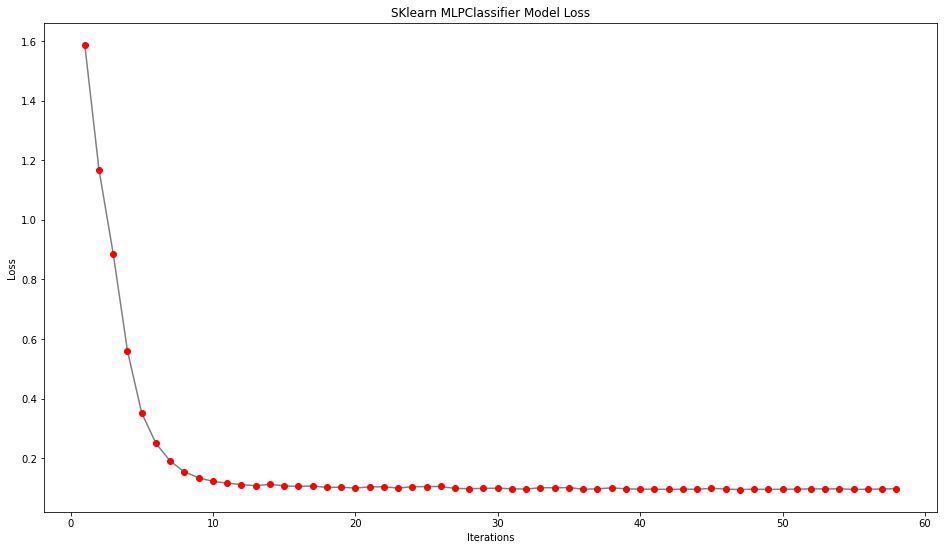

In [23]:
plt.figure(figsize=(16,9))
plt.plot(range(1,model.n_iter_+1),model.loss_curve_,c='gray',zorder=0);
plt.scatter(range(1,model.n_iter_+1),model.loss_curve_,c='red',zorder=1);
plt.title("SKlearn MLPClassifier Model Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

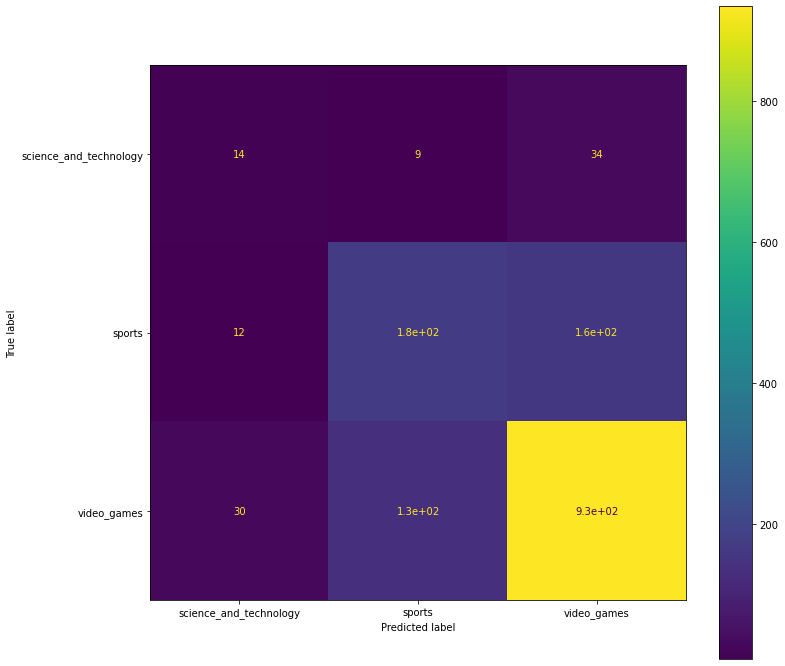

In [25]:
#Ploting confusion matrix
matrix=confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))
fig,ax=plt.subplots(figsize=(12,12))
fig=ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=y_labels)
fig.plot(ax=ax)
plt.show()